
##The implementation of different LSTM models including Encoder-Decoder based approaches for Rainfall-Runoff Modeling for Awash River in Ethiopia.


The data used to model the system are the streamflow, precipitation, temperature, wind speed, and humudity at different guaging stations in the upper Awash river basin. 28 years of daily recorded data is used.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


# Import Libraries

In [ ]:
import pandas as pd
import datetime as dt  # Python standard library datetime  module
import matplotlib.pyplot as plt
import keras
from pandas import read_csv,concat,DataFrame,datetime
import numpy
import numpy as np
from numpy import concatenate

import math
from math import sqrt

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,mean_squared_error,mean_absolute_error

from tensorflow.keras import regularizers,optimizers
from tensorflow.keras.layers import BatchNormalization,Dense, Dropout, LSTM, GRU, TimeDistributed, Input, RNN,GRUCell,Lambda,Bidirectional
from tensorflow.keras.models import Sequential,Model
from keras.callbacks import Callback
from tensorflow.keras import backend as K

from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.8.2'

In [ ]:
tf.test.is_gpu_available()    #Tru if Gpu is avalible

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
!cat /proc/cpuinfo # Check the processing hardware

#Data preparation and processing

The Path below goes to my mounted GoogleDrive - It should be changed based on your GoogleDrive directory.

In [ ]:
path= "/content/drive/MyDrive/1981_final/"

In [ ]:
!ls

drive  sample_data


The Datasets were slightly modified before uploading them.

1) Missing data was replaced by taking the average of previous 3 years on similar date of record.

#Stream flow data for 3 stations 1) Berga station 2)Akaki Station 3) Hombole station (this is the target station to predict future streamflow)

In [ ]:
sf_berga = pd.read_csv(path + 'berga.csv')
sf_akaki = pd.read_csv(path + 'Akaki.csv')
sf_hom = pd.read_csv(path + 'hombole.csv')

#Precipitation at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [ ]:
pcp_aa = pd.read_csv(path + 'pcp_aa.csv') # preciptation at addis ababa station
pcp_hom = pd.read_csv(path + 'pcp_hom.csv') # preciptation at hombole station
pcp_asgori = pd.read_csv(path + 'pcp_asgori.csv') # preciptation at asgori station
pcp_sendefa = pd.read_csv(path + 'pcp_sendefa.csv') # preciptation at sendefa station
pcp_tulubolo = pd.read_csv(path + 'pcp_tulubolo.csv') # preciptation at tulubolo station

pcp_sebeta = pd.read_csv(path + 'pcp_sebeta.csv') # preciptation at sebeta station
pcp_aalem = pd.read_csv(path + 'pcp_aalem.csv') # preciptation at addis alem station
pcp_boneya = pd.read_csv(path + 'pcp_boneya.csv') # preciptation at boneya station
pcp_kimoye = pd.read_csv(path + 'pcp_kimoye.csv') # preciptation at kimoye station
pcp_guranda = pd.read_csv(path + 'pcp_guranda.csv') # preciptation at guranda meta station

pcp_ginchi = pd.read_csv(path + 'pcp_ginchi.csv') # preciptation at ginchi station

#Average of (min and max) temprature at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [ ]:
temp_aa = pd.read_csv(path + 'tmp_aa.csv') # temprature at addis ababa station
temp_hom = pd.read_csv(path + 'tmp_hom.csv') # preciptation at hombole station
temp_asgori = pd.read_csv(path + 'tmp_asgori.csv') # preciptation at asgori station
temp_sendefa = pd.read_csv(path + 'tmp_sendefa.csv') # preciptation at sendefa station
temp_tulubolo = pd.read_csv(path + 'tmp_tulubolo.csv') # preciptation at tulubolo station

temp_sebeta = pd.read_csv(path + 'tmp_sebeta.csv') # preciptation at sebeta station
temp_aalem = pd.read_csv(path + 'tmp_aalem.csv') # preciptation at addis alem station
temp_boneya = pd.read_csv(path + 'tmp_boneya.csv') # preciptation at boneya station
temp_kimoye = pd.read_csv(path + 'tmp_kimoye.csv') # preciptation at kimoye station
temp_guranda = pd.read_csv(path + 'tmp_guranda.csv') # preciptation at guranda meta station

temp_ginchi = pd.read_csv(path + 'tmp_ginchi.csv') # preciptation at ginchi station

#Humudity at at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [ ]:
hmd_aa = pd.read_csv(path + 'hmd_aa.csv') # humudity at addis ababa station
hmd_hom = pd.read_csv(path + 'hmd_hom.csv') # preciptation at hombole station
hmd_asgori = pd.read_csv(path + 'hmd_asgori.csv') # preciptation at asgori station
hmd_sendefa = pd.read_csv(path + 'hmd_sendefa.csv') # preciptation at sendefa station
hmd_tulubolo = pd.read_csv(path + 'hmd_tulubolo.csv') # preciptation at tulubolo station

hmd_sebeta = pd.read_csv(path + 'hmd_sebeta.csv') # preciptation at sebeta station
hmd_aalem = pd.read_csv(path + 'hmd_aalem.csv') # preciptation at addis alem station
hmd_boneya = pd.read_csv(path + 'hmd_boneya.csv') # preciptation at boneya station
hmd_kimoye = pd.read_csv(path + 'hmd_kimoye.csv') # preciptation at kimoye station
hmd_guranda = pd.read_csv(path + 'hmd_guranda.csv') # preciptation at guranda meta station

hmd_ginchi = pd.read_csv(path + 'hmd_ginchi.csv') # preciptation at ginchi station

#Wind Speed at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [ ]:
wnd_aa = pd.read_csv(path + 'wnd_aa.csv') # wind speed at addis ababa station
wnd_hom = pd.read_csv(path + 'wnd_hom.csv') # preciptation at hombole station
wnd_asgori = pd.read_csv(path + 'wnd_asgori.csv') # preciptation at asgori station
wnd_sendefa = pd.read_csv(path + 'wnd_sendefa.csv') # preciptation at sendefa station
wnd_tulubolo = pd.read_csv(path + 'wnd_tulubolo.csv') # preciptation at tulubolo station

wnd_sebeta = pd.read_csv(path + 'wnd_sebeta.csv') # preciptation at sebeta station
wnd_aalem = pd.read_csv(path + 'wnd_aalem.csv') # preciptation at addis alem station
wnd_boneya = pd.read_csv(path + 'wnd_boneya.csv') # preciptation at boneya station
wnd_kimoye = pd.read_csv(path + 'wnd_kimoye.csv') # preciptation at kimoye station
wnd_guranda = pd.read_csv(path + 'wnd_guranda.csv') # preciptation at guranda meta station

wnd_ginchi = pd.read_csv(path + 'wnd_ginchi.csv') # preciptation at ginchi station

#Make date as index

In [ ]:
## format datetime column
sf_hom["date"] = pd.to_datetime(sf_hom['date'])
sf_hom = sf_hom.set_index(['date'])
sf_berga["date"] = pd.to_datetime(sf_berga['date'])
sf_berga = sf_berga.set_index(['date'])
sf_akaki["date"] = pd.to_datetime(sf_akaki['date'])
sf_akaki = sf_akaki.set_index(['date'])

## format datetime column
pcp_aa["date"] = pd.to_datetime(pcp_aa['date'])
pcp_aa = pcp_aa.set_index(['date'])
pcp_hom["date"] = pd.to_datetime(pcp_hom['date'])
pcp_hom = pcp_hom.set_index(['date'])
pcp_asgori["date"] = pd.to_datetime(pcp_asgori['date'])
pcp_asgori = pcp_asgori.set_index(['date'])
pcp_sendefa["date"] = pd.to_datetime(pcp_sendefa['date'])
pcp_sendefa = pcp_sendefa.set_index(['date'])
pcp_tulubolo["date"] = pd.to_datetime(pcp_tulubolo['date'])
pcp_tulubolo = pcp_tulubolo.set_index(['date'])
pcp_sebeta["date"] = pd.to_datetime(pcp_sebeta['date'])
pcp_sebeta = pcp_sebeta.set_index(['date'])
pcp_aalem["date"] = pd.to_datetime(pcp_aalem['date'])
pcp_aalem = pcp_aalem.set_index(['date'])
pcp_boneya["date"] = pd.to_datetime(pcp_boneya['date'])
pcp_boneya = pcp_boneya.set_index(['date'])
pcp_kimoye["date"] = pd.to_datetime(pcp_kimoye['date'])
pcp_kimoye = pcp_kimoye.set_index(['date'])
pcp_guranda["date"] = pd.to_datetime(pcp_guranda['date'])
pcp_guranda = pcp_guranda.set_index(['date'])
pcp_ginchi["date"] = pd.to_datetime(pcp_ginchi['date'])
pcp_ginchi = pcp_ginchi.set_index(['date'])
## 
temp_aa["date"] = pd.to_datetime(temp_aa['date'])
temp_aa = temp_aa.set_index(['date'])
temp_hom["DATE"] = pd.to_datetime(temp_hom['DATE'])
temp_hom = temp_hom.set_index(['DATE'])
temp_asgori["date"] = pd.to_datetime(temp_asgori['date'])
temp_asgori = temp_asgori.set_index(['date'])
temp_sendefa["date"] = pd.to_datetime(temp_sendefa['date'])
temp_sendefa = temp_sendefa.set_index(['date'])
temp_tulubolo["date"] = pd.to_datetime(temp_tulubolo['date'])
temp_tulubolo = temp_tulubolo.set_index(['date'])
temp_sebeta["date"] = pd.to_datetime(temp_sebeta['date'])
temp_sebeta = temp_sebeta.set_index(['date'])
temp_aalem["date"] = pd.to_datetime(temp_aalem['date'])
temp_aalem = temp_aalem.set_index(['date'])
temp_boneya["date"] = pd.to_datetime(temp_boneya['date'])
temp_boneya = temp_boneya.set_index(['date'])
temp_kimoye["date"] = pd.to_datetime(temp_kimoye['date'])
temp_kimoye = temp_kimoye.set_index(['date'])
temp_guranda["date"] = pd.to_datetime(temp_guranda['date'])
temp_guranda = temp_guranda.set_index(['date'])
temp_ginchi["date"] = pd.to_datetime(temp_ginchi['date'])
temp_ginchi = temp_ginchi.set_index(['date'])
## 
hmd_aa["date"] = pd.to_datetime(hmd_aa['date'])
hmd_aa = hmd_aa.set_index(['date'])
hmd_hom["date"] = pd.to_datetime(hmd_hom['date'])
hmd_hom = hmd_hom.set_index(['date'])
hmd_asgori["date"] = pd.to_datetime(hmd_asgori['date'])
hmd_asgori = hmd_asgori.set_index(['date'])
hmd_sendefa["date"] = pd.to_datetime(hmd_sendefa['date'])
hmd_sendefa = hmd_sendefa.set_index(['date'])
hmd_tulubolo["date"] = pd.to_datetime(hmd_tulubolo['date'])
hmd_tulubolo = hmd_tulubolo.set_index(['date'])
hmd_sebeta["date"] = pd.to_datetime(hmd_sebeta['date'])
hmd_sebeta = hmd_sebeta.set_index(['date'])
hmd_aalem["date"] = pd.to_datetime(hmd_aalem['date'])
hmd_aalem = hmd_aalem.set_index(['date'])
hmd_boneya["date"] = pd.to_datetime(hmd_boneya['date'])
hmd_boneya = hmd_boneya.set_index(['date'])
hmd_kimoye["date"] = pd.to_datetime(hmd_kimoye['date'])
hmd_kimoye = hmd_kimoye.set_index(['date'])
hmd_guranda["date"] = pd.to_datetime(hmd_guranda['date'])
hmd_guranda = hmd_guranda.set_index(['date'])
hmd_ginchi["date"] = pd.to_datetime(hmd_ginchi['date'])
hmd_ginchi = hmd_ginchi.set_index(['date'])
## 
wnd_aa["date"] = pd.to_datetime(wnd_aa['date'])
wnd_aa = wnd_aa.set_index(['date'])
wnd_hom["date"] = pd.to_datetime(wnd_hom['date'])
wnd_hom = wnd_hom.set_index(['date'])
wnd_asgori["date"] = pd.to_datetime(wnd_asgori['date'])
wnd_asgori = wnd_asgori.set_index(['date'])
wnd_sendefa["date"] = pd.to_datetime(wnd_sendefa['date'])
wnd_sendefa = wnd_sendefa.set_index(['date'])
wnd_tulubolo["date"] = pd.to_datetime(wnd_tulubolo['date'])
wnd_tulubolo = wnd_tulubolo.set_index(['date'])
wnd_sebeta["date"] = pd.to_datetime(wnd_sebeta['date'])
wnd_sebeta = wnd_sebeta.set_index(['date'])
wnd_aalem["date"] = pd.to_datetime(wnd_aalem['date'])
wnd_aalem = wnd_aalem.set_index(['date'])
wnd_boneya["date"] = pd.to_datetime(wnd_boneya['date'])
wnd_boneya = wnd_boneya.set_index(['date'])
wnd_kimoye["date"] = pd.to_datetime(wnd_kimoye['date'])
wnd_kimoye = wnd_kimoye.set_index(['date'])
wnd_guranda["date"] = pd.to_datetime(wnd_guranda['date'])
wnd_guranda = wnd_guranda.set_index(['date'])
wnd_ginchi["date"] = pd.to_datetime(wnd_ginchi['date'])
wnd_ginchi = wnd_ginchi.set_index(['date'])

In [ ]:
# print("Stream Flow description:\n", sf_hom.describe(), "\n")
# print("Precipitation description:\n", pcp_aa.describe(), "\n")

# print("Temperature description:\n", temp_aa.describe(), "\n")

# print("Humudity description:\n",hmd_aa.describe(), "\n")
# print("Wind speed description:\n",wnd_aa.describe(), "\n")

#Convert to floating point values 

In [ ]:
sf_hom['streamflow']=sf_hom['streamflow'].astype(float)
sf_akaki['streamflow']=sf_akaki['streamflow'].astype(float)
sf_berga['streamflow']=sf_berga['streamflow'].astype(float)

pcp_aa['PCP']=pcp_aa['PCP'].astype(float)
pcp_hom['PCP']=pcp_hom['PCP'].astype(float)
pcp_asgori['PCP']=pcp_asgori['PCP'].astype(float)
pcp_sendefa['PCP']=pcp_sendefa['PCP'].astype(float)
pcp_tulubolo['PCP']=pcp_tulubolo['PCP'].astype(float)
pcp_sebeta['PCP']=pcp_sebeta['PCP'].astype(float)
pcp_aalem['PCP']=pcp_aalem['PCP'].astype(float)
pcp_boneya['PCP']=pcp_boneya['PCP'].astype(float)
pcp_kimoye['PCP']=pcp_kimoye['PCP'].astype(float)
pcp_guranda['PCP']=pcp_guranda['PCP'].astype(float)
pcp_ginchi['PCP']=pcp_ginchi['PCP'].astype(float)


temp_aa['avg_temp']=temp_aa['avg_temp'].astype(float)
temp_hom['avg_temp']=temp_hom['avg_temp'].astype(float)
temp_asgori['avg_temp']=temp_asgori['avg_temp'].astype(float)
temp_sendefa['avg_temp']=temp_sendefa['avg_temp'].astype(float)
temp_tulubolo['avg_temp']=temp_tulubolo['avg_temp'].astype(float)
temp_sebeta['avg_temp']=temp_sebeta['avg_temp'].astype(float)
temp_aalem['avg_temp']=temp_aalem['avg_temp'].astype(float)
temp_boneya['avg_temp']=temp_boneya['avg_temp'].astype(float)
temp_kimoye['avg_temp']=temp_kimoye['avg_temp'].astype(float)
temp_guranda['avg_temp']=temp_guranda['avg_temp'].astype(float)
temp_ginchi['avg_temp']=temp_ginchi['avg_temp'].astype(float)


hmd_aa['HMD']=hmd_aa['HMD'].astype(float)
hmd_hom['HMD']=hmd_hom['HMD'].astype(float)
hmd_asgori['HMD']=hmd_asgori['HMD'].astype(float)
hmd_sendefa['HMD']=hmd_sendefa['HMD'].astype(float)
hmd_tulubolo['HMD']=hmd_tulubolo['HMD'].astype(float)
hmd_sebeta['HMD']=hmd_sebeta['HMD'].astype(float)
hmd_aalem['HMD']=hmd_aalem['HMD'].astype(float)
hmd_boneya['HMD']=hmd_boneya['HMD'].astype(float)
hmd_kimoye['HMD']=hmd_kimoye['HMD'].astype(float)
hmd_guranda['HMD']=hmd_guranda['HMD'].astype(float)
hmd_ginchi['HMD']=hmd_ginchi['HMD'].astype(float)

wnd_aa['WND']=wnd_aa['WND'].astype(float)
wnd_hom['WND']=wnd_hom['WND'].astype(float)
wnd_asgori['WND']=wnd_asgori['WND'].astype(float)
wnd_sendefa['WND']=wnd_sendefa['WND'].astype(float)
wnd_tulubolo['WND']=wnd_tulubolo['WND'].astype(float)
wnd_sebeta['WND']=wnd_sebeta['WND'].astype(float)
wnd_aalem['WND']=wnd_aalem['WND'].astype(float)
wnd_boneya['WND']=wnd_boneya['WND'].astype(float)
wnd_kimoye['WND']=wnd_kimoye['WND'].astype(float)
wnd_guranda['WND']=wnd_guranda['WND'].astype(float)
wnd_ginchi['WND']=wnd_ginchi['WND'].astype(float)

#Stream flow plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6fdd555f90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6fde3c3f90>)

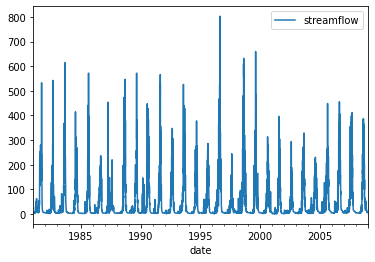

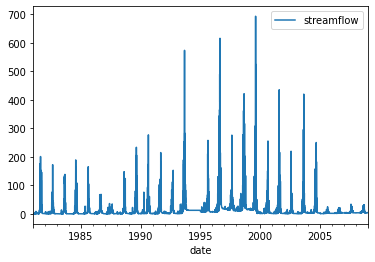

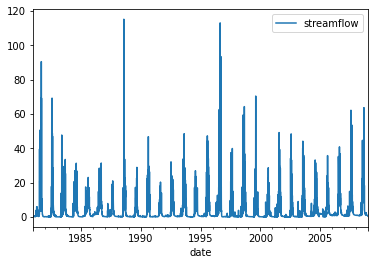

In [ ]:
sf_hom.plot(), sf_akaki.plot(), sf_berga.plot()

#precipitation plots

In [ ]:
pcp_aa.plot(), pcp_hom.plot(),pcp_asgori.plot(),pcp_sendefa.plot(),pcp_tulubolo.plot(),pcp_aalem.plot(), pcp_sebeta.plot(),pcp_boneya.plot(),pcp_kimoye.plot(),pcp_ginchi.plot(),pcp_guranda.plot()

#Tempature Plots

In [ ]:
temp_aa.plot(), temp_hom.plot(),temp_asgori.plot(),temp_sendefa.plot(),temp_tulubolo.plot(),temp_aalem.plot(), temp_sebeta.plot(),temp_boneya.plot(),temp_kimoye.plot(),temp_ginchi.plot(),temp_guranda.plot()

#Humudity Plots

In [ ]:
hmd_aa.plot(), hmd_hom.plot(),hmd_asgori.plot(),hmd_sendefa.plot(),hmd_tulubolo.plot(),hmd_aalem.plot(), hmd_sebeta.plot(),hmd_boneya.plot(),hmd_kimoye.plot(),hmd_ginchi.plot(),hmd_guranda.plot()

#wind plots

In [ ]:
wnd_aa.plot(),wnd_hom.plot(),wnd_asgori.plot(),wnd_sendefa.plot(),wnd_tulubolo.plot(),wnd_aalem.plot(), wnd_sebeta.plot(),wnd_boneya.plot(),wnd_kimoye.plot(),wnd_ginchi.plot(),wnd_guranda.plot()

#Resampled daily, weekly, monthly and yearly mean value for streamflow at target station

In [ ]:
sf_hom_D = sf_hom.resample('1D').mean()
sf_hom_W = sf_hom.resample('1W').mean()
sf_hom_M = sf_hom.resample('1M').mean()
sf_hom_Y = sf_hom.resample('1Y').mean()


sf_hom_D.plot(title="Discharge daily mean")
sf_hom_W.plot(title="Discharge weekly mean")
sf_hom_M.plot(title="Discharge monthly mean",figsize=(15,7))
sf_hom_Y.plot(title="Discharge yearly mean")

#Autocorrelation for streamflow at 3 different guaging stations

In [ ]:
pd.plotting.autocorrelation_plot(sf_hom['streamflow'])
#ax= pd.plotting.autocorrelation_plot(sf_hom['streamflow'])
#ax.set_xlim([0, 2000])
plt.title("Discharge daily mean")
plt.show()

pd.plotting.autocorrelation_plot(sf_akaki['streamflow'])
plt.title("Discharge weekly mean")
plt.show()

pd.plotting.autocorrelation_plot(sf_berga['streamflow'])
plt.title("Discharge monthly mean")
plt.show()

#from the graphs we can see that there is a corellation between the streamflows and their lags. But after 2000 days the correlation starts to decrease.
# The negative correlation between the time lags is mostly insignificant. This may be due to seasonality of the streamflow---meaning that in one
#season the streamflow may be high and on the next season it will be less 
# The plot also shows seasonality of the data 

In [ ]:
print(len(sf_akaki['streamflow']))
plot_acf(sf_akaki['streamflow'],lags=50)

plot_acf(sf_hom['streamflow'],lags=50)

plot_acf(sf_berga['streamflow'],lags=50)

#Autocorrelation for preciptation at 11 guaging stations 

In [ ]:
#pd.plotting.autocorrelation_plot(pcp_aa['PCP'])
plot_acf(pcp_aa['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_hom['PCP'])
plot_acf(pcp_hom['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_asgori['PCP'])
plot_acf(pcp_asgori['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_sendefa['PCP'])
plot_acf(pcp_sendefa['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_tulubolo['PCP'])
plot_acf(pcp_tulubolo['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_aalem['PCP'])
plot_acf(pcp_aalem['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_boneya['PCP'])
plot_acf(pcp_boneya['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_kimoye['PCP'])
plot_acf(pcp_kimoye['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_sebeta['PCP'])
plot_acf(pcp_sebeta['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_guranda['PCP'])
plot_acf(pcp_guranda['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_ginchi['PCP'])
plot_acf(pcp_ginchi['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#Autocorrelation for temperature at 11 guaging stations

In [ ]:
# pd.plotting.autocorrelation_plot(temp_aa['avg_temp'])
# plt.title("Temperature daily")
# plt.show()

#pd.plotting.autocorrelation_plot(temp_aa['avg_temp'])
plot_acf(temp_aa['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_hom['avg_temp'])
plot_acf(temp_hom['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_asgori['avg_temp'])
plot_acf(temp_asgori['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_sendefa['avg_temp'])
plot_acf(temp_sendefa['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_tulubolo['avg_temp'])
plot_acf(temp_tulubolo['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_aalem['avg_temp'])
plot_acf(temp_aalem['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_boneya['avg_temp'])
plot_acf(temp_boneya['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_kimoye['avg_temp'])
plot_acf(temp_kimoye['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_sebeta['avg_temp'])
plot_acf(temp_sebeta['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_guranda['avg_temp'])
plot_acf(temp_guranda['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_ginchi['avg_temp'])
plot_acf(temp_ginchi['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()


#Autocorrelation for Humudity at 11 guaging stations

In [ ]:
pd.plotting.autocorrelation_plot(hmd_tulubolo['HMD'])
plot_acf(hmd_tulubolo['HMD'],lags=100)
plt.title("humidity daily")
plt.show()

In [ ]:
#pd.plotting.autocorrelation_plot(hmd_ginchi['HMD'])
plot_acf(hmd_ginchi['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#the jumidity at ginchi station does not have any corelation and it is removed from our dataset since it will not help on prediction task.

In [ ]:
# pd.plotting.autocorrelation_plot(hmd_aa['HMD'])
# plt.title("humudirt daily")
# plt.show()

#pd.plotting.autocorrelation_plot(hmd_aa['HMD'])
plot_acf(hmd_aa['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_hom['HMD'])
plot_acf(hmd_hom['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_asgori['HMD'])
plot_acf(hmd_asgori['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_sendefa['HMD'])
plot_acf(hmd_sendefa['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_tulubolo['HMD'])
plot_acf(hmd_tulubolo['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_aalem['HMD'])
plot_acf(hmd_aalem['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_boneya['HMD'])
plot_acf(hmd_boneya['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_kimoye['HMD'])
plot_acf(hmd_kimoye['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_sebeta['HMD'])
plot_acf(hmd_sebeta['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_guranda['HMD'])
plot_acf(hmd_guranda['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_ginchi['HMD'])
plot_acf(hmd_ginchi['HMD'],lags=50)
plt.title("humidity daily")
plt.show()


#Autocorrelation for wind at 11 guaging stations

In [ ]:
# pd.plotting.autocorrelation_plot(wnd_aa['WND'])
# plt.title("wind daily")
# plt.show()

#pd.plotting.autocorrelation_plot(wnd_aa['WND'])
plot_acf(wnd_aa['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_hom['WND'])
plot_acf(wnd_hom['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_asgori['WND'])
plot_acf(wnd_asgori['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_sendefa['WND'])
plot_acf(wnd_sendefa['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_tulubolo['WND'])
plot_acf(wnd_tulubolo['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_aalem['WND'])
plot_acf(wnd_aalem['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_boneya['WND'])
plot_acf(wnd_boneya['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_kimoye['WND'])
plot_acf(wnd_kimoye['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_sebeta['WND'])
plot_acf(wnd_sebeta['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_guranda['WND'])
plot_acf(wnd_guranda['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_ginchi['WND'])
plot_acf(wnd_ginchi['WND'],lags=50)
plt.title("wind daily")
plt.show()


#Data Preparation for multivariate input(i.e preciptation,temp,hum,wind @ 11 guaging stations and lagged discharge @ 3 guaging stations) and single step output (streamflow at target guaging station) LSTM MODEL

#Supervised data generating function

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

#variable declaration

In [ ]:
look_back = 5 #Number of time-steps/ time-lags (in days) to see in the past before predicting the current/future 
n_features = 47 #Temp (11 station), rain (@ 11 station), humudity (@ 11 stations), wind speed (@ 11 stations)
                # and lagged discharge (@ 2 other stations and the target station which is hombole)

In [ ]:
n_hours = look_back

#1. Training data preparation on year based slicing of pandas dataframe into trainig, validation and test, 20 years data used for training , 4 years data for validation and 4 years data for testing

#Dataframe for multivariate training

In [ ]:
raw = DataFrame()
#Temperature features 
raw['temp_aa'] = temp_aa['avg_temp']
raw['temp_hom'] = temp_hom['avg_temp']
raw['temp_asgori'] = temp_asgori['avg_temp']
raw['temp_sendefa'] = temp_sendefa['avg_temp']
raw['temp_tulubolo'] = temp_tulubolo['avg_temp']
raw['temp_aalem'] = temp_aalem['avg_temp']
raw['temp_boneya'] = temp_boneya['avg_temp']
raw['temp_kimoye'] = temp_kimoye['avg_temp']
raw['temp_sebeta'] = temp_sebeta['avg_temp']
raw['temp_guranda'] = temp_guranda['avg_temp']
raw['temp_ginchi'] = temp_ginchi['avg_temp']
# #preciptation features
raw['rain_aa'] = pcp_aa['PCP']
raw['rain_hom'] = pcp_hom['PCP']
raw['rain_asgori'] = pcp_asgori['PCP']
raw['rain_sendefa'] = pcp_sendefa['PCP']
raw['rain_tulubolo'] = pcp_tulubolo['PCP']
raw['rain_aalem'] = pcp_aalem['PCP']
raw['rain_boneya'] = pcp_boneya['PCP']
raw['rain_kimoye'] = pcp_kimoye['PCP']
raw['rain_sebeta'] = pcp_sebeta['PCP']
raw['rain_guranda'] = pcp_guranda['PCP']
raw['rain_ginchi'] = pcp_ginchi['PCP']
# #Humudity features 
raw['hmd_aa'] = hmd_aa['HMD']
raw['hmd_hom'] = hmd_hom['HMD']
raw['hmd_asgori'] = hmd_asgori['HMD']
raw['hmd_sendefa'] = hmd_sendefa['HMD']
raw['hmd_tulubolo'] = hmd_tulubolo['HMD']
raw['hmd_aalem'] = hmd_aalem['HMD']
raw['hmd_boneya'] = hmd_boneya['HMD']
raw['hmd_kimoye'] = hmd_kimoye['HMD']
raw['hmd_sebeta'] = hmd_sebeta['HMD']
raw['hmd_guranda'] = hmd_guranda['HMD']
raw['hmd_ginchi'] = hmd_ginchi['HMD']

# #Wind features 
raw['wnd_aa'] = wnd_aa['WND']
raw['wnd_hom'] = wnd_hom['WND']
raw['wnd_asgori'] = wnd_asgori['WND']
raw['wnd_sendefa'] = wnd_sendefa['WND']
raw['wnd_tulubolo'] = wnd_tulubolo['WND']
raw['wnd_aalem'] = wnd_aalem['WND']
raw['wnd_boneya'] = wnd_boneya['WND']
raw['wnd_kimoye'] = wnd_kimoye['WND']
raw['wnd_sebeta'] = wnd_sebeta['WND']
raw['wnd_guranda'] = wnd_guranda['WND']
raw['wnd_ginchi'] = wnd_ginchi['WND']

#Streamflow features
raw['Q_akaki'] = sf_akaki['streamflow']
raw['Q_berga'] = sf_berga['streamflow']
raw['Q_hom'] = sf_hom['streamflow']

values_2 = raw.values

#Training data partition (1981 - 2000)

In [ ]:
raw_train= raw.loc['1981-01-01':'2000-12-31']
values_train = raw_train.values

#Validation data partition (2001 - 2004)

In [ ]:
raw_val = raw.loc['2001-01-01':'2004-12-31']
values_val = raw_val.values

#Test data partition (2004 - 2008)

In [ ]:
raw_test = raw.loc['2005-01-01':'2008-12-31']
values_test = raw_test.values

#Generating Supervised data for train, valid and test

In [ ]:
sup_train = series_to_supervised(values_train, n_hours, 1) 

print(sup_train.shape)

(7300, 282)


In [ ]:
sup_val = series_to_supervised(values_val, n_hours, 1) 

print(sup_val.shape)

(1456, 282)


In [ ]:
sup_test = series_to_supervised(values_test, n_hours, 1) 

print(sup_test.shape)

(1456, 282)


#You can use either of the following 2 drop column approaches to re-format your training dataset. But not both at the same time

#a) Drop columuns at the beginning of the dataframe (i.e the first supervised data sample) to make the data in the form of previous (t-n-1, ....t) for the pcp, temp,hmd,wnd,and two other stream flows and (t-n, t-n-1, ....t-1) for the lagged target station streamflow data.

In [ ]:
sup_train.drop(sup_train.iloc[:,0:46], axis=1, inplace=True)
sup_train

In [ ]:
sup_val.drop(sup_val.iloc[:,0:46], axis=1, inplace=True)
sup_val

In [ ]:
sup_test.drop(sup_test.iloc[:,0:46], axis=1, inplace=True)
sup_test

In [ ]:
sup_test

#b) Drop the columuns for pcp, temp,hmd,wnd at all stations and two other stream flow data at the end of the dataframe to make the model input features at (t-n, t-n-1, .....t-1) for all features including the target streamflow.

Note: please do not use the drop option in b) if you use the previous drop option in a). only use either of them not both.

In [ ]:
sup_train.drop(sup_train.iloc[:,470:516], axis=1, inplace=True)
sup_train

In [ ]:
sup_val.drop(sup_val.iloc[:,470:516], axis=1, inplace=True)
sup_val

In [ ]:
sup_test.drop(sup_test.iloc[:,470:516], axis=1, inplace=True)
sup_test

In [ ]:
sup_test

##Train, validation and Test split

In [ ]:
train = sup_train.values
val = sup_val.values
test = sup_test.values

In [ ]:
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]
val_X, val_y = val[:, :n_obs], val[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
print(test_X.shape, len(test_X), test_y.shape)
print(val_X.shape, len(val_X), val_y.shape)

(7300, 235) 7300 (7300,)
(1456, 235) 1456 (1456,)
(1456, 235) 1456 (1456,)


#2. Training data prepartion by randomly classifying the whole data into train, validation and test

#Generate supervised data

In [ ]:
reframed = series_to_supervised(values_2, n_hours, 1) 

print(reframed.shape)

(10217, 517)


#Use either of (a or b) (but not both at same time) drop column approaches for re-formatting your training data

#a) Drop columuns at the beginning of the dataframe (i.e the first supervised data sample) to make the data in the form of previous (t-n-1, ....t) for the pcp, temp,hmd,wnd,and two other stream flows and (t-n, t-n-1, ....t-1) for the lagged target station streamflow data.

In [ ]:
reframed.drop(reframed.iloc[:,0:46], axis=1, inplace=True)
reframed

#b) Drop the columuns for pcp, temp,hmd,wnd at all stations and two other stream flow data at the end of the dataframe to make the data at (t-n, t-n-1, .....t-1) for all features including the target streamflow.

In [ ]:
reframed.drop(reframed.iloc[:,470:516], axis=1, inplace=True)
reframed

#Train, Validation and Test split

In [ ]:
values_2 = reframed.values
TRAIN_SIZE = 0.8 # this value can be changed based on your problem and data analysis
n_train = int(len(values_2) * TRAIN_SIZE) 
train = values_2[:n_train, :]
eval = values_2[n_train:, :]

In [ ]:
TEST_SIZE = 0.5 # this value can be changed based on your problem and data analysis
n_val= int(len(eval) * TEST_SIZE) 
val = eval[:n_val, :]
test = eval[n_val:, :]

In [ ]:
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]
val_X, val_y = val[:, :n_obs], val[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
print(test_X.shape, len(test_X), test_y.shape)
print(val_X.shape, len(val_X), val_y.shape)

(8173, 470) 8173 (8173,)
(1022, 470) 1022 (1022,)
(1022, 470) 1022 (1022,)


#Feature scaling (the next part of code will work for both approaches described above as 1) and 2) )

In [ ]:
# feature scaling
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train = scaler_X.fit_transform(train_X)

scaler_Y = MinMaxScaler(feature_range=(0, 1))
Y_train = scaler_Y.fit_transform(train_y.reshape(-1,1))

In [ ]:
X_test = scaler_X.transform(test_X)
Y_test = scaler_Y.transform(test_y.reshape(-1,1))

X_val = scaler_X.transform(val_X)
Y_val = scaler_Y.transform(val_y.reshape(-1,1))

#Reshaping train, validation and test data into 3D shape since LSTM takes as input a data in the format (samples, time-step, sample_features)

In [ ]:
train_X2 = X_train.reshape((X_train.shape[0], n_hours, n_features))
test_X2 = X_test.reshape((X_test.shape[0], n_hours, n_features))
val_X2 = X_val.reshape((X_val.shape[0], n_hours, n_features))
print(train_X2.shape, test_X2.shape, val_X2.shape)

(7300, 5, 47) (1456, 5, 47) (1456, 5, 47)


In [ ]:
# train_y2 = Y_train.reshape((Y_train.shape[0], 1, 1))
# test_y2 = Y_test.reshape((Y_test.shape[0], 1, 1))
# val_y2 = Y_val.reshape((Y_val.shape[0], 1, 1))
# print(train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape,val_X2.shape, val_y2.shape)

train_y2 = Y_train
test_y2 = Y_test
val_y2 = Y_val
print(train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape,val_X2.shape, val_y2.shape)

(7300, 5, 47) (7300, 1) (1456, 5, 47) (1456, 1) (1456, 5, 47) (1456, 1)


#Model setup without using Gridsearch algorithm

In [ ]:
#opt = tf.keras.optimizers.SGD(learning_rate=0.01)
#opt = tf.keras.optimizers.Adamax(learning_rate=0.001)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [ ]:
model2 = Sequential()
model2.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2]), return_sequences=True, activation='relu'))
#model2.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2]),  activation='relu'))
#model2.add(Dropout(0.25)) # Dropout regularisation
model2.add(LSTM(50,  activation='relu'))
#model2.add(Dropout(0.25)) # Dropout regularisation
model2.add(Dense(1))
#model2.compile(loss=nse_loss, optimizer='adam', metrics=['mae','mse'])
model2.compile(loss='mse', optimizer=opt, metrics=['mae','mse'])

In [ ]:
model2 = Sequential()
model2.add(Bidirectional(   LSTM(50, activation='relu', return_sequences=True),   input_shape=(train_X2.shape[1], train_X2.shape[2])    ))
#model2.add(Bidirectional(   LSTM(100, activation='relu'),   input_shape=(train_X2.shape[1], train_X2.shape[2])    ))
#model2.add(Dropout(0.25)) # Dropout regularisation
model2.add(Bidirectional(   LSTM(50, activation='relu')    ))
#model2.add(Dropout(0.25)) # Dropout regularisation
model2.add(Dense(1))
model2.compile(loss= 'mse', optimizer=opt, metrics=['mae','mse'])

In [ ]:
history2 = model2.fit(train_X2, train_y2, epochs=50, batch_size=100, validation_data=(val_X2, val_y2), verbose=1, shuffle=False)

Epoch 1/50
73/73 [==============================] - 3s 32ms/step - loss: 0.0133 - mae: 0.0707 - mse: 0.0133 - val_loss: 0.0010 - val_mae: 0.0214 - val_mse: 0.0010
Epoch 2/50
73/73 [==============================] - 2s 30ms/step - loss: 0.0031 - mae: 0.0301 - mse: 0.0031 - val_loss: 0.0011 - val_mae: 0.0186 - val_mse: 0.0011
Epoch 3/50
73/73 [==============================] - 2s 29ms/step - loss: 0.0029 - mae: 0.0284 - mse: 0.0029 - val_loss: 9.1011e-04 - val_mae: 0.0176 - val_mse: 9.1011e-04
Epoch 4/50
73/73 [==============================] - 2s 29ms/step - loss: 0.0024 - mae: 0.0240 - mse: 0.0024 - val_loss: 8.2861e-04 - val_mae: 0.0174 - val_mse: 8.2861e-04
Epoch 5/50
73/73 [==============================] - 2s 30ms/step - loss: 0.0023 - mae: 0.0233 - mse: 0.0023 - val_loss: 9.3408e-04 - val_mae: 0.0188 - val_mse: 9.3408e-04
Epoch 6/50
73/73 [==============================] - 2s 29ms/step - loss: 0.0019 - mae: 0.0209 - mse: 0.0019 - val_loss: 7.5502e-04 - val_mae: 0.0152 - val_mse: 7

#Model setup using Gridsearch for parameter optimization

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2]), activation='relu'))
    #grid_model.add(LSTM(50,return_sequences=True,input_shape=(10,23)))
    #grid_model.add(LSTM(50))
    #grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
    
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(test_X2, test_y2))

parameters = {'batch_size' : [8, 16,32,64,128,256],
              'epochs' : [10,20,30,50,70,90,120,150,200],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


In [ ]:
grid_search = grid_search.fit(train_X2, train_y2)
#started training @9:36 AM

Epoch 1/10
511/511 [==============================] - 18s 29ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 2/10
511/511 [==============================] - 18s 35ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/10
511/511 [==============================] - 12s 23ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 4/10
511/511 [==============================] - 10s 20ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/10
511/511 [==============================] - 11s 21ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 6/10
511/511 [==============================] - 10s 20ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 7/10
511/511 [==============================] - 10s 20ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
511/511 [==============================] - 10s 20ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 9/10
511/511 [==============================] - 10s 20ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 10/10
511/511 [==============================] - 2s 4ms/step - loss: 0.0011


#Check best parameters of the model

In [ ]:
grid_search.best_params_

#Save the best model in my_ In the model variable.

In [ ]:
my_model=grid_search.best_estimator_.model

#Plot train and valid loss curve

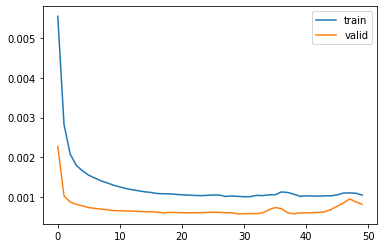

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='valid')
plt.legend()
plt.show()

#Prediction for test dataset

In [ ]:
yhat2 = model2.predict(test_X2)
inv_yhat2 = scaler_Y.inverse_transform(yhat2)

orig = test_y2.reshape((len(test_y2), 1))
inv_y2 = scaler_Y.inverse_transform(orig)

#Calculate the RMSE

In [ ]:
rmse2 = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Test RMSE: %.4f' % rmse2)

Test RMSE: 28.9310


In [ ]:
# mae of zero means there is no error or the predicted value perfectly fits the original data
mae= mean_absolute_error(inv_y2, inv_yhat2)
print('Test mae: %.4f' % mae)

Test mae: 13.6843


In [ ]:
nse = 1-(np.sum(np.power((inv_y2-inv_yhat2),2))/np.sum(np.power((inv_y2-inv_y2.mean()),2)))
print('Test NSE: %.4f' % nse)

Test NSE: 0.8886


#plot prediction result for predicted and original test dataset

inv_y2 (OBS) max: 455.706  versus inv_yhat2 (SIM) max: 382.95746


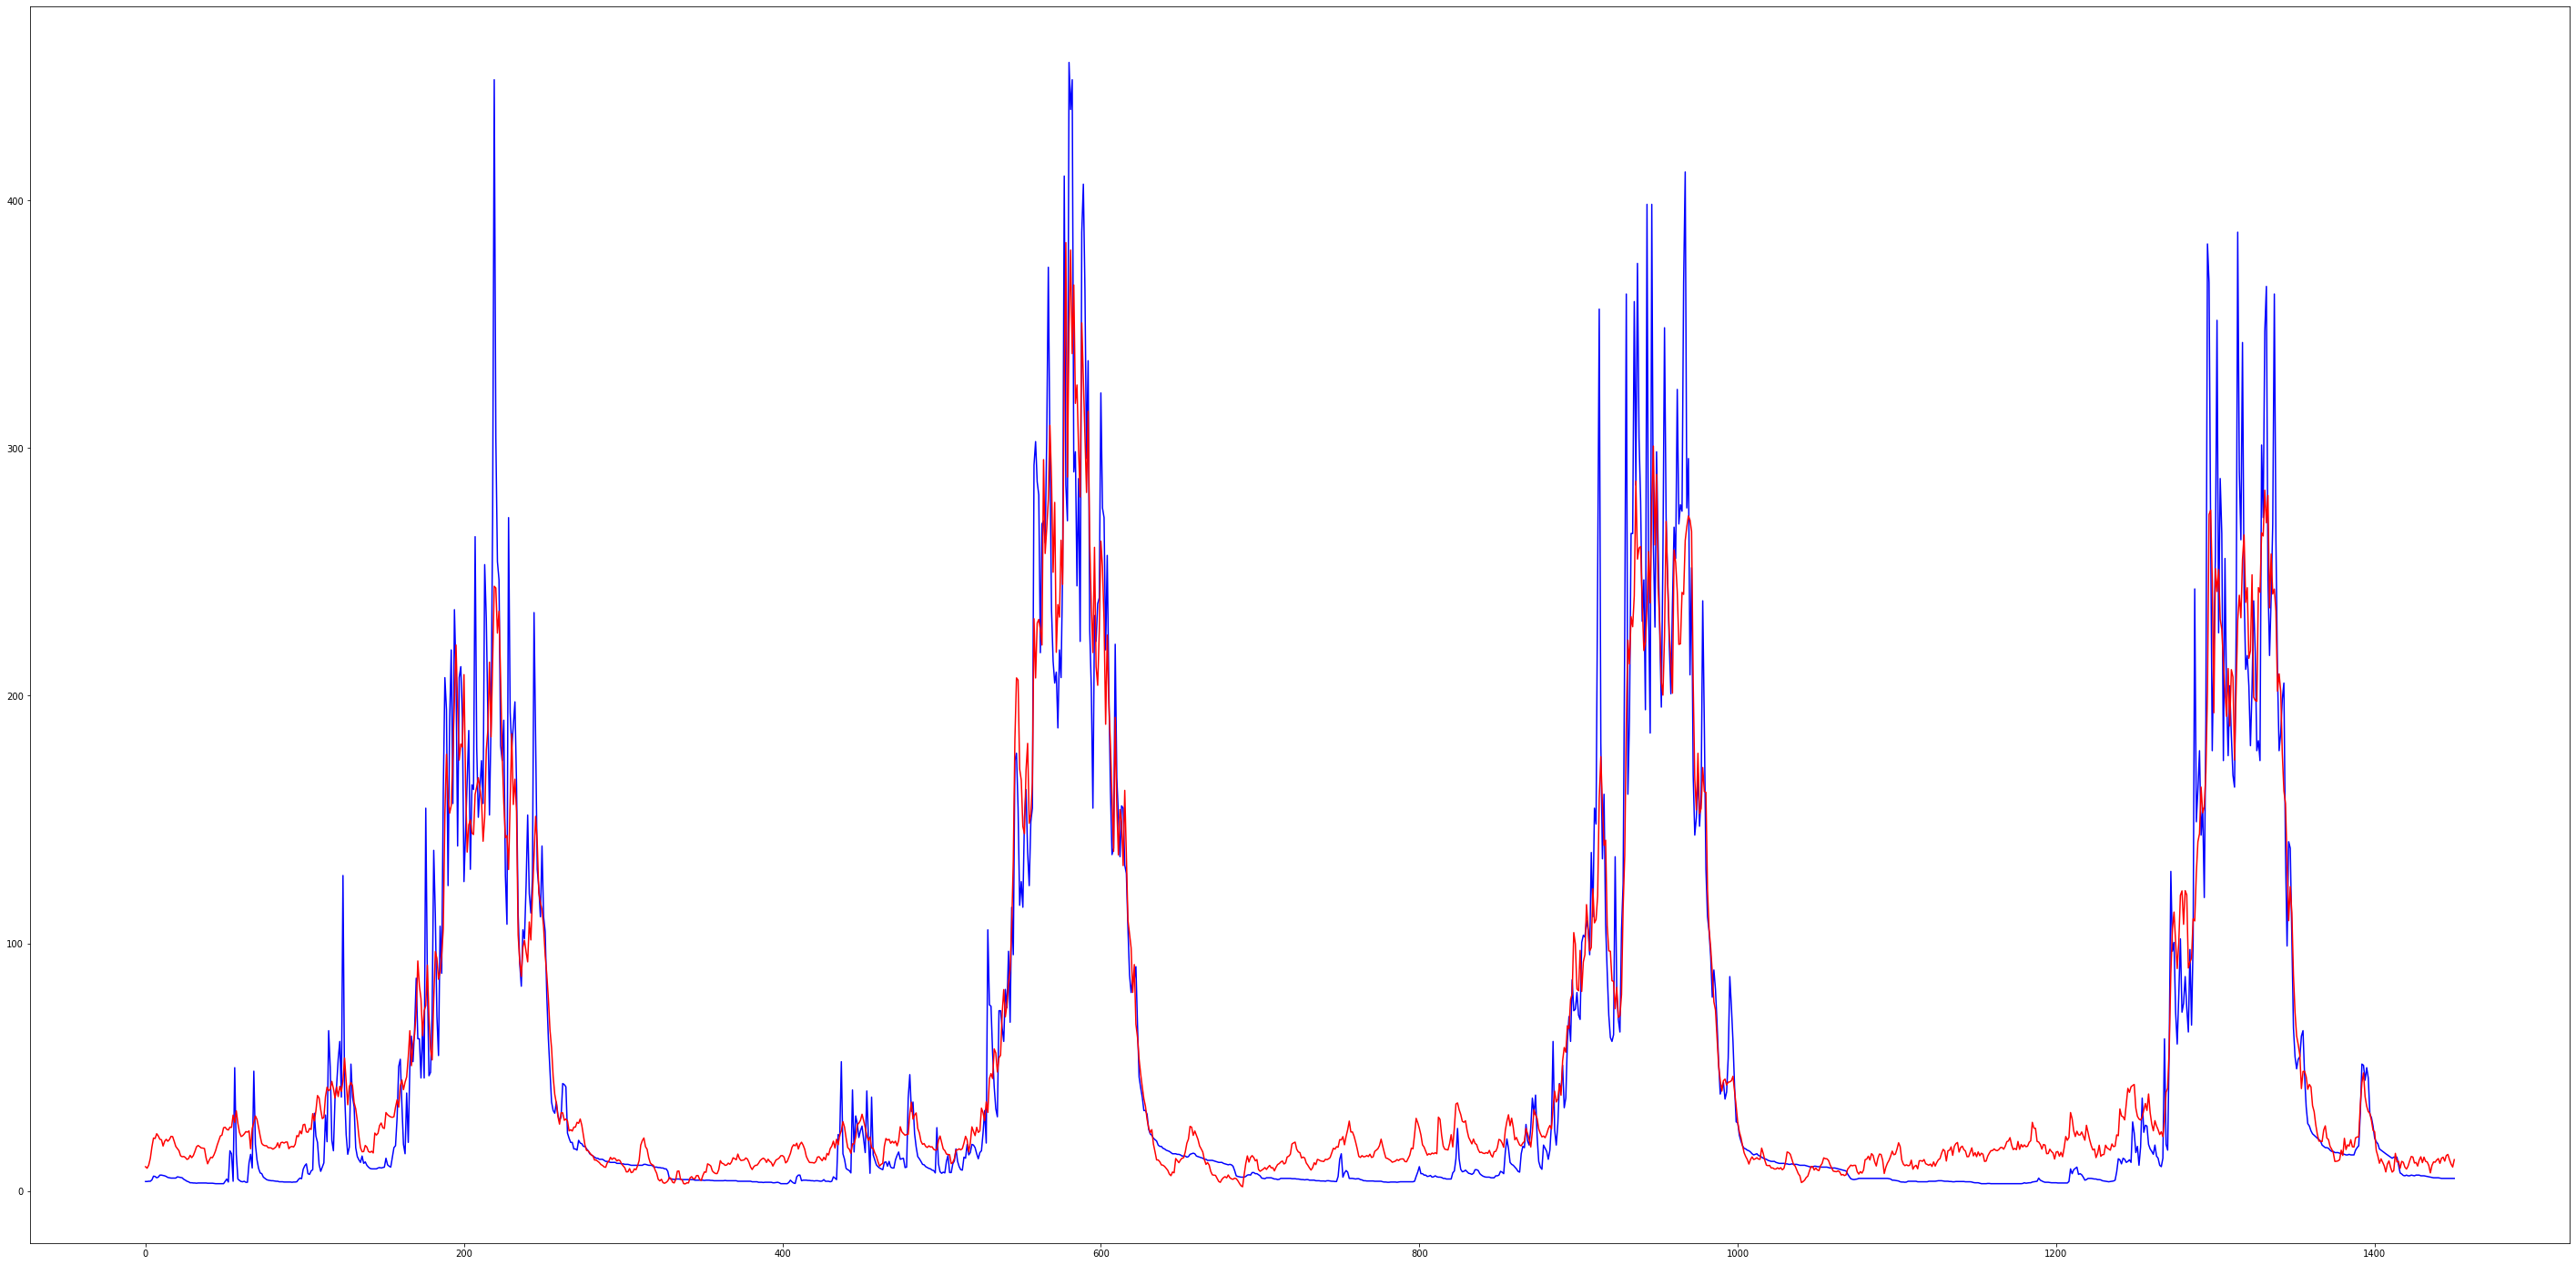

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y2),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat2))
plt.figure(figsize=(50,25))
plt.plot(inv_y2, color='blue')
plt.plot(inv_yhat2,color='red')
plt.show()

In [ ]:
df_inv_y2 = pd.DataFrame(data=inv_y2,index=raw2.index,columns=['inv_y2'])
df_inv_yhat2 = pd.DataFrame(data=inv_yhat2,index=raw2.index,columns=['inv_yhat2'])

fig, ax = plt.subplots(1,1, figsize=(20,10))

# x axis to plot both runoff and precip. against
x = df_inv_y2.index

ax.plot(x, df_inv_y2, color="blue", label='Observed Discharge')
ax.plot(x, df_inv_yhat2,color='black', label='Predicted Discharge')



# Create second axes, in order to get the bars from the top you can multiply 
# by -1
ax2 = ax.twinx()
ax2.bar(x, -raw2['rain'], color="gray", label='Rain')
ax2.bar(x, -df_snow['snow'], color="red", label='Snow')

# Now need to fix the axis labels
max_pre = np.int(np.trunc(max(raw2['rain']))+10)
y2_ticks = np.linspace(0, max_pre, max_pre+1)
y2_ticklabels = [str(i) for i in y2_ticks]
ax2.set_yticks(-1 * y2_ticks)
ax2.set_yticklabels(y2_ticklabels)

handles2, labels2 = ax2.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()
ax2.legend(handles2 + handles, labels2 + labels, loc='upper left', frameon=False)

ax.set_ylim([0,0.2])
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Discharge [cmps]', fontsize=14)
ax2.set_ylabel('Precipitation [mm]', fontsize=14)

plt.title('LSTM-ANN Model 2 v.2 Batchsize 8760',fontsize=20, color = 'black')

plt.show()

NameError: ignored